## Tokenization Practice

In [ ]:
#!pip install nltk

In [1]:
#libraries
import requests
import re
import numpy as np
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import gutenberg
import collections
from nltk.tokenize import RegexpTokenizer
from string import whitespace
import string
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### 1. Upload a text

This text shows....

In [16]:
# ......
data = requests.get('https://www.gutenberg.org/ebooks/35688.html.images')
    
  #  'http://www.gutenberg.org/cache/epub/8001/pg8001.html'

In [17]:
content = data.content

In [20]:
print(content[5163:5500])

b'/p>\r\n<hr class="c2">\r\n<div class="note">\r\n<p>This dramatic rendering of <i>Alice in Wonderland</i>, by Alice Gerstenberg of Chicago, was produced by The Players Producing Company of Chicago (Aline Barnsdall and Arthur Bissell), at the Fine Arts Theater, Chicago, February 11, 1915. After a successful run it opened at the Booth Theater, '


## 2. Clean Text

In [5]:
soup = BeautifulSoup(content, "html.parser")

In [4]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    return stripped_text

In [41]:
stripped_text = strip_html_tags(content)

### Replacements

In [2]:
replacement_patterns = [
(r'won\'t', 'will not'),
(r'can\'t', 'cannot'),
(r'i\'m', 'i am'),
(r'ain\'t', 'is not'),
(r'(\w+)(\'ll)', r'\g<1> will'),
(r'(\w+)(n\'t)', r'\g<1> not'),
(r'(\w+)(\'ve)', r'\g<1> have'),
(r'(it)(\'s)', r'\g<1> is'),
#(r'(\w+)(\'s)', r'\g<1> s'),
(r'(\w+)(\'re)', r'\g<1> are'),
(r'(\w+)(\'d)', r'\g<1> would')
]

In [3]:
class RegexpReplacer(object):
    def __init__(self, patterns=replacement_patterns):
        self.patterns = [(re.compile(regex), repl) for (regex, repl) in patterns]
    def replace(self, text):
        s = text
        for (pattern, repl) in self.patterns:
            (s, count) = re.subn(pattern, repl, s)
        return s

In [34]:
sample_text = "I've seen most powerful supercomputers. It's over twice as fast..."

In [35]:
replacer= RegexpReplacer()
replacer.replace(sample_text.lower())

'i have seen most powerful supercomputers. it is over twice as fast...'

In [42]:
replacer.replace(stripped_text[2000:2100])

' cast:\nLewis Carroll\nFrank Stirling\nAlice\nVivian Tobin\nRed Queen\nFlorence LeClercq\nWhite Queen\nMary '

In [13]:
sample_text.lower()

"i've seen most powerful supercomputers. it's over twice as fast..."

In [35]:
sample_text.upper()

"I'VE SEEN MOST POWERFUL SUPERCOMPUTERS. IT'S OVER TWICE AS FAST..."

In [36]:
sample_text.title()

"I'Ve Seen Most Powerful Supercomputers. It'S Over Twice As Fast..."

In [14]:
sample_text.split(' ')

["I've",
 'seen',
 'most',
 'powerful',
 'supercomputers.',
 "It's",
 'over',
 'twice',
 'as',
 'fast...']

## Step 2 Tokenizer

In [7]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [6]:
alice = gutenberg.raw(fileids='carroll-alice.txt')

# or https://www.gutenberg.org/cache/epub/35688/pg35688.txt
# repeate steps witth beatiful soup


### Default Sentence Tokenizer

In [7]:
default_st = nltk.sent_tokenize
alice_sentences = default_st(text=alice)

In [52]:
print('Total sentences in alice:', len(alice_sentences))
print('First 2 sentences in alice:-')
print(np.array(alice_sentences[0:2]))

Total sentences in alice: 1625
First 2 sentences in alice:-
["[Alice's Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I."
 "Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, 'and what is the use of a book,' thought Alice 'without pictures or\nconversation?'"]


### Default Word Tokenizer

In [8]:
default_wt = nltk.word_tokenize
words = default_wt(alice)
np.array(words[0:5])

array(['[', 'Alice', "'s", 'Adventures', 'in'], dtype='<U10')

In [10]:
tokens_sentences = [default_wt(t) for t in default_st(alice)]
np.array(tokens_sentences[0:5])

array([list(['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.']),
       list(['Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', ',', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it', ',', "'and", 'what', 'is', 'the', 'use', 'of', 'a', 'book', ',', "'", 'thought', 'Alice', "'without", 'pictures', 'or', 'conversation', '?', "'"]),
       list(['So', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', '(', 'as', 'well', 'as', 'she', 'could', ',', 'for', 'the', 'hot', 'day', 'made', 'her', 'feel', 'very', 'sleepy', 'and', 'stupid', ')', ',', 'whether', 'the', 'pleasure', 'of', 'making', 'a', 'daisy-chain', 'would', 'be', 'worth', 'the', 'troub

In [58]:
words = [word for sentence in tokens_sentences for word in sentence]
print(words[1:25])

['Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of']


In [59]:
from nltk.probability import FreqDist 
fdist = FreqDist(words) 
print(fdist)

<FreqDist with 3185 samples and 33493 outcomes>


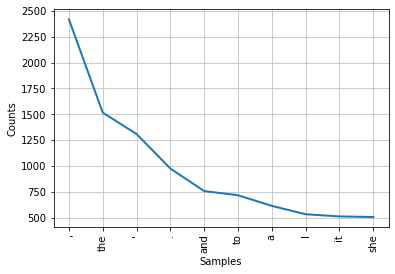

In [60]:
import matplotlib.pyplot as plt
fdist.plot(10,cumulative=False)
plt.show()

### Remove Punctuation and Count Tokens

In [11]:
tokenizer = RegexpTokenizer(r'\w+') #only words
tokens_sentences = [tokenizer.tokenize(t) for t in default_st(alice)]
words = [word.lower() for sentence in tokens_sentences for word in sentence]

In [12]:
word_counts = collections.Counter(words)
word_counts.most_common(10)

[('the', 1642),
 ('and', 872),
 ('to', 729),
 ('a', 632),
 ('it', 595),
 ('she', 553),
 ('i', 543),
 ('of', 514),
 ('said', 462),
 ('you', 411)]

In [16]:
all_chars = len(alice)
num_chars = len(alice.translate(str.maketrans('','',whitespace)))
num_words = len(words)
num_sents = len(tokens_sentences)
num_vocab = len(set(words))
print(int(all_chars/num_words),int(num_chars/num_words), 
      int(num_words/num_sents), 
      int(num_words/num_vocab))

5 4 16 10


### Stemmers

In [2]:
from nltk.stem import PorterStemmer

In [5]:
ps = PorterStemmer()
ps.stem('jumping'), ps.stem('jumps'), ps.stem('jumped')

('jump', 'jump', 'jump')

In [6]:
ps.stem('speak'),ps.stem('speaker')

('speak', 'speaker')

In [4]:
from nltk.stem import SnowballStemmer
print('Supported Languages:', SnowballStemmer.languages)

Supported Languages: ('arabic', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish')


In [5]:
ss = SnowballStemmer("german")
ss.stem('autobahnen')

'autobahn'

### Lemmatizer

In [17]:
from nltk.stem import WordNetLemmatizer

In [13]:
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize("running", pos='v'))
print(lemmatizer.lemmatize("running",pos='n'))

run
running


In [14]:
for word in  sample_text.split(' '):
    lemmatizer.lemmatize(word)
    print(word)

I've
seen
most
powerful
supercomputer.
It's
over
twice
as
fast...


In [24]:
sent = 'These guys brought three refrigerators upstairs.'
lemmatizer = WordNetLemmatizer()
lem = ' '.join([lemmatizer.lemmatize(w.lower()) for w in nltk.word_tokenize(sent)])
lem

'these guy brought three refrigerator upstairs .'

In [17]:
word_list = nltk.word_tokenize(sample_text)
print(word_list)
#> ['The', 'striped', 'bats', 'are', 'hanging', 'on', 'their', 'feet', 'for', 'best']

# Lemmatize list of words and join
lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
print(lemmatized_output)

['I', "'ve", 'seen', 'most', 'powerful', 'supercomputers', '.', 'It', "'s", 'over', 'twice', 'as', 'fast', '...']
I 've seen most powerful supercomputer . It 's over twice a fast ...


### StopWords

In [12]:
len(nltk.corpus.stopwords.words('english'))

179

In [19]:
tokenizer = RegexpTokenizer(r'\w+') #only words
tokens_sentences = [tokenizer.tokenize(t) for t in default_st(alice)]
words = [word.lower() for sentence in tokens_sentences for word in sentence]

In [30]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
filtered_words = [w for w in words if not w in stop_words] 

In [27]:
word_counts = collections.Counter(filtered_words)
word_counts.most_common(10)

[('said', 462),
 ('alice', 398),
 ('little', 128),
 ('one', 104),
 ('know', 88),
 ('like', 85),
 ('would', 83),
 ('went', 83),
 ('could', 77),
 ('queen', 75)]

### Customed Word LIst

In [28]:
custom_list = ['like','would','could','said','one']
stop_words.extend(custom_list)

In [29]:
extended_words = [w for w in words if not w in stop_words] 
word_counts = collections.Counter(extended_words)
word_counts.most_common(10)

[('alice', 398),
 ('little', 128),
 ('know', 88),
 ('went', 83),
 ('queen', 75),
 ('thought', 74),
 ('time', 71),
 ('see', 67),
 ('well', 63),
 ('king', 63)]

## POS 

In [46]:
nltk_pos_tagged = nltk.pos_tag(words[15:40])
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag']).T

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Word,the,Rabbit-Hole,Alice,was,beginning,to,get,very,tired,of,...,the,bank,",",and,of,having,nothing,to,do,:
POS tag,DT,JJ,NNP,VBD,VBG,TO,VB,RB,JJ,IN,...,DT,NN,",",CC,IN,VBG,NN,TO,VB,:


In [5]:
sent = 'John and Mary bought a refrigerator with three doors.'

In [7]:
sent = 'John and Mary bought a refrigerator with three doors.'
default_st = nltk.sent_tokenize
tokenizer = RegexpTokenizer(r'\w+') #only words
tokens_sentences = [tokenizer.tokenize(t) for t in default_st(sent)]
words = [word.lower() for sentence in tokens_sentences for word in sentence]
nltk_pos_tagged = nltk.pos_tag(words)
nltk_pos_tagged

In [9]:
nltk_pos_tagged

[('john', 'NN'),
 ('and', 'CC'),
 ('mary', 'JJ'),
 ('bought', 'VBD'),
 ('a', 'DT'),
 ('refrigerator', 'NN'),
 ('with', 'IN'),
 ('three', 'CD'),
 ('doors', 'NNS')]

In [10]:
from nltk import pos_tag, word_tokenize

In [14]:
tags = pos_tag(word_tokenize(sent))

In [15]:
for word, tag in tags:
    print(word, '->', tag)

John -> NNP
and -> CC
Mary -> NNP
bought -> VBD
a -> DT
refrigerator -> NN
with -> IN
three -> CD
doors -> NNS
. -> .


In [67]:
nltk_pos_tagged = nltk.pos_tag(words[40:53])
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag']).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
Word,once,or,twice,she,had,peeped,into,the,book,her,sister,was,reading
POS tag,RB,CC,VB,PRP,VBD,VBN,IN,DT,NN,PRP$,NN,VBD,VBG


### Split into train and Test

In [48]:
len(tokens_sentences)

1625

In [49]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test = train_test_split(tokens_sentences, test_size=0.2, random_state=1)

In [54]:
len(X_test), len(X_train)

(325, 1300)

In [55]:
grammar = """
NP: {<DT>?<JJ>?<NN.*>and<NN.*>}
ADJP: {<JJ>}
ADVP: {<RB.*>}
PP: {<IN>}
VP: {<MD>?<VB.*>+}
"""

In [68]:
from nltk.chunk import RegexpParser
rc = RegexpParser(grammar)
c = rc.parse(nltk_pos_tagged)
print(c)

In [69]:
c.draw()

In [70]:
print(c)

(S
  (ADVP once/RB)
  or/CC
  (VP twice/VB)
  she/PRP
  (VP had/VBD peeped/VBN)
  (PP into/IN)
  (NP the/DT book/NN)
  her/PRP$
  (NP sister/NN)
  (VP was/VBD reading/VBG))


## Precision and Recall

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd

In [53]:
example = pd.read_csv('classification.csv', 
                          encoding='latin1', sep=",")

In [54]:
y_true = example.iloc[:, 4].values
y_pred = example.iloc[:, 3].values

In [55]:
example

,example,output,correct,ypred,ytrue
0,Bugs Bunny,left,right,1,3
1,Howard Stern,center,centre,2,2
2,Jason Brown,left,center,1,2
3,John Major,right,center,3,2
4,Jonathan Swift,left,left,1,1
5,Karl Marx,left,left,1,1
6,Mitt Romney,right,center,3,2
7,Noam Chomsky,left,left,1,1
8,Pippi Longstocking,center,center,2,2
9,Ralph Nader,left,left,1,1


In [51]:
y_true

array([ 3.,  2.,  2.,  2., nan,  1.,  2.,  1.,  2.,  1.,  3.,  3., nan])

In [60]:
accuracy = accuracy_score(y_true, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_true, y_pred, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_true, y_pred, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true, y_pred, average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.538462
Precision: 0.534799
Recall: 0.538462
F1 score: 0.503996
